In [40]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score, silhouette_score
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

In [22]:
# Load Data
customers = pd.read_csv('https://drive.google.com/uc?id=1q1CAF7RaH0uM2X4ehHRRqbQJr7utqzWf')  # customers.csv link
products = pd.read_csv('https://drive.google.com/uc?id=1w5ztz7bqbYJYsvY2Sj4tfFJuSWd3cEhJ')  # products.csv link
transactions = pd.read_csv('https://drive.google.com/uc?id=1z4DK_nmAzyRnjIqQXrDC98h-b5BAahdr')  # transactions.csv link

In [5]:
# Convert date columns
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])

In [6]:
# Merge datasets
merged_data = transactions.merge(customers, on='CustomerID').merge(products, on='ProductID')

In [41]:
# Feature Engineering: Extract features for clustering
merged_data['CustomerAge'] = (merged_data['TransactionDate'].max() - merged_data['SignupDate']).dt.days
merged_data['TransactionMonth'] = merged_data['TransactionDate'].dt.month
merged_data['TransactionYear'] = merged_data['TransactionDate'].dt.year
merged_data['RevenuePerUnit'] = merged_data['TotalValue'] / merged_data['Quantity']

In [42]:
# One-Hot Encoding Region
encoder = OneHotEncoder(drop='first', sparse_output=False)  # Updated argument name
region_encoded = encoder.fit_transform(merged_data[['Region']])
region_encoded_df = pd.DataFrame(region_encoded, columns=encoder.get_feature_names_out(['Region']))

In [45]:
# Combine One-Hot Encoded Region with other numerical features
numerical_columns = ['Price_y', 'TotalValue']  # Include 'TotalValue' as a numerical feature for clustering
customer_features = merged_data[numerical_columns].copy()

In [32]:
# Select numerical features for clustering
numerical_columns = ['Price_y', 'TotalValue']
customer_features = merged_data[numerical_columns].copy()

In [46]:
# Scale the numerical features for clustering (StandardScaler is commonly used)
scaler = StandardScaler()
scaled_features = scaler.fit_transform(customer_features)

In [68]:
# Ensure that all columns in final_features have string column names
final_features.columns = final_features.columns.astype(str)

In [87]:
# Loop through different cluster counts
for k in range(2, 11):  # Loop through different cluster counts
    kmeans = KMeans(n_clusters=k, random_state=42)
    merged_data[f'Cluster_KMeans_{k}'] = kmeans.fit_predict(final_features)

    # Calculate Davies-Bouldin index and Silhouette score
    db_index = davies_bouldin_score(final_features, merged_data[f'Cluster_KMeans_{k}'])
    silhouette = silhouette_score(final_features, merged_data[f'Cluster_KMeans_{k}'])

    print(f"Clusters: {k} | DB Index: {db_index} | Silhouette Score: {silhouette}")

    # Evaluate the clustering and print results
    print(f"Clustering Results for {k} clusters saved.")

Clusters: 2 | DB Index: 0.9833781725362074 | Silhouette Score: 0.39428291182413683
Clustering Results for 2 clusters saved.
Clusters: 3 | DB Index: 1.1742393813920824 | Silhouette Score: 0.3248824052946662
Clustering Results for 3 clusters saved.
Clusters: 4 | DB Index: 1.2225820916863028 | Silhouette Score: 0.27618210861618364
Clustering Results for 4 clusters saved.
Clusters: 5 | DB Index: 1.2475632587776453 | Silhouette Score: 0.2727053419454289
Clustering Results for 5 clusters saved.
Clusters: 6 | DB Index: 1.42399427232451 | Silhouette Score: 0.26171482086696995
Clustering Results for 6 clusters saved.
Clusters: 7 | DB Index: 1.413331451514877 | Silhouette Score: 0.27194038557218847
Clustering Results for 7 clusters saved.
Clusters: 8 | DB Index: 1.3029172978965846 | Silhouette Score: 0.30095571685557004
Clustering Results for 8 clusters saved.
Clusters: 9 | DB Index: 1.1979833339734183 | Silhouette Score: 0.3424927914978623
Clustering Results for 9 clusters saved.
Clusters: 10 |

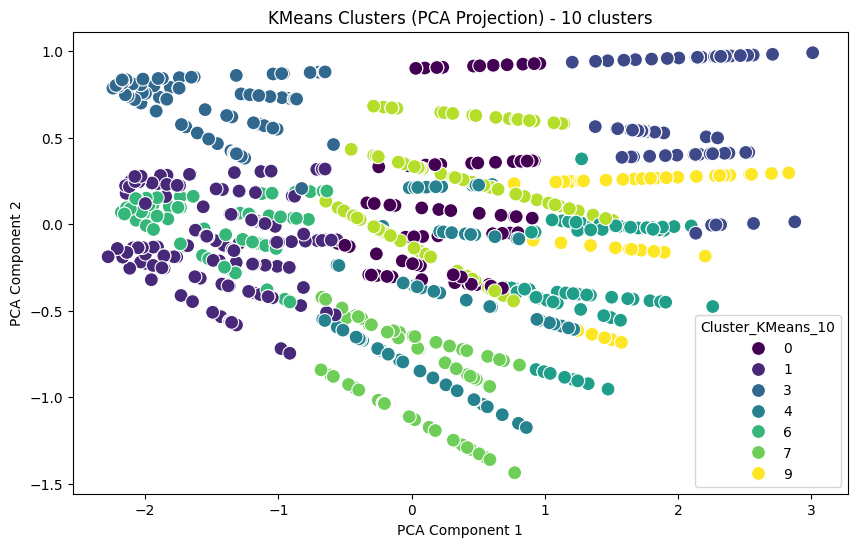

In [94]:
# Visualization of Clusters using PCA
pca = PCA(n_components=2)
pca_components = pca.fit_transform(final_features)
plt.figure(figsize=(10, 6))
sns.scatterplot(x=pca_components[:, 0], y=pca_components[:, 1], hue=merged_data[f'Cluster_KMeans_{k}'], palette='viridis', s=100)
plt.title(f"KMeans Clusters (PCA Projection) - {k} clusters")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()

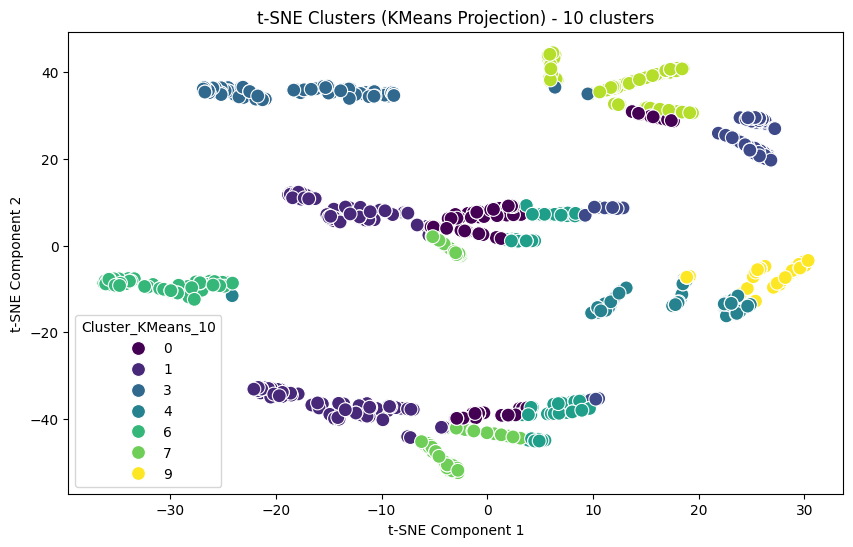

In [95]:
# Visualization using t-SNE (for better separation of clusters)
tsne = TSNE(n_components=2, random_state=42)
tsne_components = tsne.fit_transform(final_features)
plt.figure(figsize=(10, 6))
sns.scatterplot(x=tsne_components[:, 0], y=tsne_components[:, 1], hue=merged_data[f'Cluster_KMeans_{k}'], palette='viridis', s=100)
plt.title(f"t-SNE Clusters (KMeans Projection) - {k} clusters")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.show()

In [96]:
# Generate Cluster Profile (mean of numeric features per cluster)
# Exclude non-numeric columns before calculating mean
numeric_columns = merged_data.select_dtypes(include=['number']).columns  # Only numeric columns
cluster_profile = merged_data.groupby(f'Cluster_KMeans_{k}')[numeric_columns].mean()

print(f"Cluster Profile for {k} clusters:")
print(cluster_profile)

Cluster Profile for 10 clusters:
                   Quantity  Total_Transaction_Value     Price_x  \
Cluster_KMeans_10                                                  
0                  3.323232               898.879798  273.364848   
1                  2.431818               261.026989  114.288580   
2                  3.685393              1568.003258  426.890674   
3                  2.552381               249.988667   99.201524   
4                  2.063830               636.869681  327.089362   
5                  2.833333              1158.515833  415.148854   
6                  2.367089               253.648608  110.752785   
7                  1.220930               442.195116  368.062791   
8                  1.843478               641.423304  356.312087   
9                  3.508197              1415.584262  409.627541   

                   Product_Price  Cluster_KMeans  CustomerAge  \
Cluster_KMeans_10                                               
0                   

In [97]:
# Save Results to CSV (Final clustering with 4 clusters as an example)
final_kmeans = KMeans(n_clusters=4, random_state=42)
merged_data['Cluster_KMeans'] = final_kmeans.fit_predict(final_features)
merged_data.to_csv('Customer_Segmentation_Results.csv', index=False)


In [99]:
from google.colab import files

# Assuming the file is saved as 'Customer_Segmentation_Results.csv'
files.download('Customer_Segmentation_Results.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>